## Performance models - HPC

Here, we evaluate the performance of the hippocampus models. 

The output of the models can be downloaded from Zenodo. 

In [1]:
import os
import numpy as np
import pandas as pd
import pickle
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

pd.set_option('mode.chained_assignment', None)

from evaluate import evaluate

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42

### Read the output of the models

This takes quite long, so you can also skip this step. The resulting pickle file is also in the zenodo folder (HPC_LR_SAL.pickle)

In [2]:
# RBP = pd.read_csv('../../Zenodo/Human/HPC/RBP/RBP_peaks.csv', 
#                   index_col=0)

# # Filter for exons that have at least one RBP binding site
# exon_RBP = RBP.index[RBP.sum(axis=1) > 0]

# folders=['DL_all_6000_5',
#         'DL_var01_6000_5',
#         'DL_all_RBPall_6000_5',
#         'DL_all_RBPall_6000_5_RBPonly',
#         'DL_all_6000_5_seqonly',
#         'DL_all_6000_5_withMouse',
#         'DL_var01_6000_5_withMouse',
#          'LR_all',
#          'LR_var01',
#          'LR_var025'
#         ]

# n = len(folders)

# prefixs = np.repeat(['../../Zenodo/Human/HPC/Predictions/'], n)
# multiheads = [False, False, False, False, False, True, True, False, False, False]
# heads = [None, None, None, None, None, '/human', '/human', None, None, None]

# # Relative to the prefix
# PSI_glia = np.repeat(['../../Zenodo/Human/HPC/PSI/PSI_glia_norm.csv'], n)
# PSI_neur = np.repeat(['../../Zenodo/Human/HPC/PSI/PSI_neur_norm.csv'], n)

# res_hp = evaluate(prefixs, folders, multiheads, heads, PSI_glia, PSI_neur,
#              runs=5, folds = [0,1,2,3,4,5,6,7,8,9], split='test', 
#              RBP_only=True, exon_RBP=exon_RBP)

# with open('HPC_LR_SAL.pickle', 'wb') as handle:
#     pickle.dump(res_hp, handle, protocol=pickle.HIGHEST_PROTOCOL)


### Performance on variable exons 

In [3]:
### Content../../Zenodo/pickle files
# 0 - MSE on all exons neurons
# 1 - MSE on all exons glia
# 2 - spearman correlation all exons neurons
# 3 - spearman correlation all exons glia
# 4 - MSE on variable exons neurons
# 5 - MSE on variable exons glia
# 6 - spearman correlation variable exons neurons
# 7 - spearman correlation variable exons glia
# 8 - F1 scores (classification problem, higher in neurons or higher in glia)
# 9 - true PSI values neurons
# 10 - predicted PSI values neurons
# 11 - true PSI values glia
# 12 - predicted PSi values glia
# 13 - indicating which genes are variable genes

with open('../../Zenodo/Human/HPC/Predictions/HPC_LR_SAL.pickle', 'rb') as handle:
    res_hp = pickle.load(handle)

In [4]:
# Extract spearman correlations from the results
sp_neur = res_hp[6]
sp_glia = res_hp[7]

sp_neur.index = ['DL - all (seq+splice)', 
             'DL - var 0.1 (seq+splice)', 
             'DL - all (RBP+seq+splice)',
             'DL - all (RBP)',
             'DL - all (seq)',
             'DL - all (seq+splice) - with mouse',
             'DL - var (seq+splice) - with mouse',
             'LR - all (RBP)', 
             'LR - var 0.1 (RBP)', 
             'LR - var 0.25 (RBP)']

sp_glia.index = ['DL - all (seq+splice)', 
             'DL - var 0.1 (seq+splice)', 
             'DL - all (RBP+seq+splice)',
             'DL - all (RBP)',
             'DL - all (seq)',
             'DL - all (seq+splice) - with mouse',
             'DL - var (seq+splice) - with mouse',
             'LR - all (RBP)', 
             'LR - var 0.1 (RBP)', 
             'LR - var 0.25 (RBP)']

sp_neur = sp_neur.melt(ignore_index=False)
sp_neur['Model'] = sp_neur.index
sp_neur['Cell type'] = 'Neurons'

sp_glia = sp_glia.melt(ignore_index=False)
sp_glia['Model'] = sp_glia.index
sp_glia['Cell type'] = 'Glia'


#### Figure 1D - hippocampus

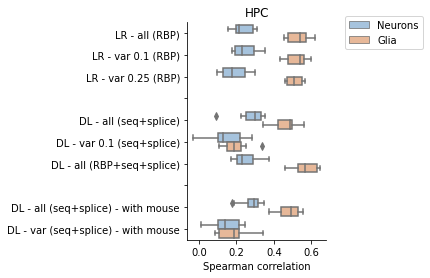

In [5]:
sp_all = pd.concat((sp_neur, sp_glia))

plt.figure(figsize=(2.5,4))
sns.boxplot(data=sp_all, x='value', y='Model', hue='Cell type',
            palette=['#9DC3E6', '#F4B68C'],
           order=[
             'LR - all (RBP)', 
             'LR - var 0.1 (RBP)', 
             'LR - var 0.25 (RBP)',
               '',
               'DL - all (seq+splice)', 
             'DL - var 0.1 (seq+splice)', 
             'DL - all (RBP+seq+splice)',
               '',
             'DL - all (seq+splice) - with mouse',
             'DL - var (seq+splice) - with mouse',
             ])
sns.despine()
plt.xlabel('Spearman correlation')
plt.ylabel('')
plt.legend(bbox_to_anchor=(1.1, 1.05))

plt.title('HPC')
plt.show()

#### S6 - testing different input features

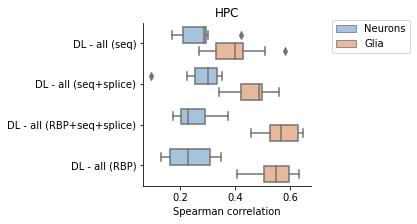

In [6]:
sp_all = pd.concat((sp_neur, sp_glia))

plt.figure(figsize=(3,3))
sns.boxplot(data=sp_all, x='value', y='Model', hue='Cell type',
            palette=['#9DC3E6', '#F4B68C'],
           order=[
                'DL - all (seq)',
               'DL - all (seq+splice)', 
             'DL - all (RBP+seq+splice)',
             'DL - all (RBP)',
             ])
sns.despine()
plt.xlabel('Spearman correlation')
plt.ylabel('')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.title('HPC')
plt.show()

### Performance on all exons

In [7]:
sp_neur = res_hp[2]
sp_glia = res_hp[3]

sp_neur.index = ['DL - all (seq+splice)', 
             'DL - var 0.1 (seq+splice)', 
             'DL - all (RBP+seq+splice)',
             'DL - all (RBP)',
             'DL - all (seq)',
             'DL - all (seq+splice) - with mouse',
             'DL - var (seq+splice) - with mouse',
             'LR - all (RBP)', 
             'LR - var 0.1 (RBP)', 
             'LR - var 0.25 (RBP)']

sp_glia.index = ['DL - all (seq+splice)', 
             'DL - var 0.1 (seq+splice)', 
             'DL - all (RBP+seq+splice)',
             'DL - all (RBP)',
             'DL - all (seq)',
             'DL - all (seq+splice) - with mouse',
             'DL - var (seq+splice) - with mouse',
             'LR - all (RBP)', 
             'LR - var 0.1 (RBP)', 
             'LR - var 0.25 (RBP)']

sp_neur = sp_neur.melt(ignore_index=False)
sp_neur['Model'] = sp_neur.index
sp_neur['Cell type'] = 'Neurons'

sp_glia = sp_glia.melt(ignore_index=False)
sp_glia['Model'] = sp_glia.index
sp_glia['Cell type'] = 'Glia'


#### Figure 1D - hippocampus

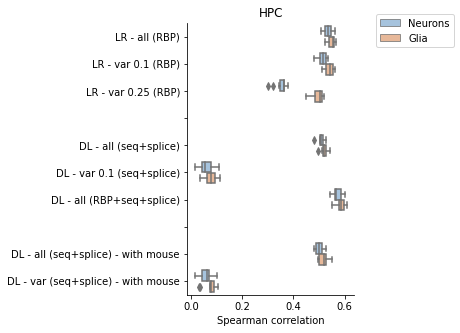

In [8]:
sp_all = pd.concat((sp_neur, sp_glia))

plt.figure(figsize=(3,5))
sns.boxplot(data=sp_all, x='value', y='Model', hue='Cell type',
            palette=['#9DC3E6', '#F4B68C'],
           order=[
             'LR - all (RBP)', 
             'LR - var 0.1 (RBP)', 
             'LR - var 0.25 (RBP)',
               '',
               'DL - all (seq+splice)', 
             'DL - var 0.1 (seq+splice)',
             'DL - all (RBP+seq+splice)',
               '',
             'DL - all (seq+splice) - with mouse',
             'DL - var (seq+splice) - with mouse',
             ])
sns.despine()
plt.xlabel('Spearman correlation')
plt.ylabel('')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.title('HPC')
plt.show()

### Scatterplots 

In [10]:
ytrue_neur = res_hp[9]
ypred_neur = res_hp[10]

ytrue_glia = res_hp[11]
ypred_glia = res_hp[12]

var_genes = res_hp[13]

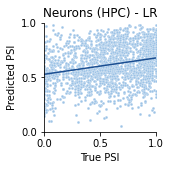

In [11]:
m, b = np.polyfit(ytrue_neur['LR_var01'][var_genes['LR_var01']],
                  ypred_neur['LR_var01'][var_genes['LR_var01']],
                  1)
plt.figure(figsize=(2,2))
sns.scatterplot(x=ytrue_neur['LR_var01'][var_genes['LR_var01']],
               y=ypred_neur['LR_var01'][var_genes['LR_var01']], 
                s=8, rasterized=True, color='#9DC3E6')
sns.lineplot(x=ytrue_neur['LR_var01'][var_genes['LR_var01']], 
             y=m*ytrue_neur['LR_var01'][var_genes['LR_var01']]+b, 
             color='#1B4E91')
sns.despine()
plt.xlim([-0.0, 1.])
plt.ylim([-0.0, 1.])
plt.yticks([0,0.5,1])
plt.xlabel('True PSI')
plt.ylabel('Predicted PSI')
plt.title('Neurons (HPC) - LR')
plt.show()

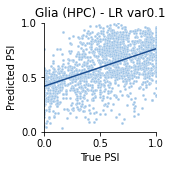

In [12]:
m, b = np.polyfit(ytrue_glia['LR_var01'][var_genes['LR_var01']],
                  ypred_glia['LR_var01'][var_genes['LR_var01']],
                  1)

plt.figure(figsize=(2,2))
sns.scatterplot(x=ytrue_glia['LR_var01'][var_genes['LR_var01']],
               y=ypred_glia['LR_var01'][var_genes['LR_var01']], 
                s=8, rasterized=True, color='#9DC3E6')
sns.lineplot(x=ytrue_glia['LR_var01'][var_genes['LR_var01']], 
             y=m*ytrue_glia['LR_var01'][var_genes['LR_var01']]+b, 
             color='#1B4E91')
sns.despine()
plt.xlim([-0.0, 1.])
plt.ylim([-0.0, 1.])
plt.yticks([0,0.5,1])
plt.xlabel('True PSI')
plt.ylabel('Predicted PSI')
plt.title('Glia (HPC) - LR var0.1')
plt.show()